In [1]:
# Use the aggregated hoshi_workflow namespace for imports
import hoshi_workflow.hoshi_reader as hr
import importlib

# If you edit the underlying module and want to reload in a running
# notebook kernel, reload the module object referenced by `hr`:
importlib.reload(hr)
import matplotlib.pyplot as plt

In [7]:
# Example usage of HoshiReader
# Set the path to the hoshi model directorym
# Here is a fake model for testing, you may replace it with your own model path
path = "../example_model/fake_model"

In [9]:
# Initialize HoshiModel and HoshiHistory
hm = hr.HoshiModel(path)

# you can access various directories of your model, and the current Hoshi environment
print(hm.summary_dir)
print(hm.writestr_dir)
print(hm.cxdata_dir)
print(hm.HOSHI_DIR)
print(hm.HOSHI_VERSION)


../example_model/fake_model/summary
../example_model/fake_model/writestr
../example_model/fake_model/cxdata
/work/HOSHI/HOSHI_opensource
HOSHI_tanby


In [10]:
# read summary/summary.txt
history = hr.HoshiHistory(hm.summary_dir)

# In summary, it may contain multiple runs
# You can check the number of runs in the summary
n_runs = history.count_runs()
print(f"Number of runs in summary: {n_runs}")

Number of runs in summary: 9


In [11]:
# use 1-based index, here the 9th run is the last run
df = history.read_run(run_index=9)

# the time series data is stored in a pandas DataFrame
print(df)

      stg  jcma  nmlo   ndv          time      dtime      Mtot          Etot  \
0    2401     6     5  1024  2.832110e+14  46.116220  19.98911 -6.612613e+50   
1    2402     6     5  1024  2.832110e+14  40.300980  19.98911 -6.589825e+50   
2    2403     6     5  1024  2.832110e+14  52.391270  19.98911 -6.576169e+50   
3    2404     6     5  1024  2.832110e+14  68.108650  19.98911 -6.563016e+50   
4    2405     6     5  1024  2.832110e+14  88.541240  19.98911 -6.548506e+50   
..    ...   ...   ...   ...           ...        ...       ...           ...   
129  2530     7     5  1024  2.832110e+14   0.006269  19.98911 -8.953150e+50   
130  2531     7     5  1024  2.832110e+14   0.005971  19.98911 -9.015551e+50   
131  2532     7     5  1024  2.832110e+14   0.005695  19.98911 -9.078172e+50   
132  2533     7     5  1024  2.832110e+14   0.005438  19.98911 -9.140991e+50   
133  2534     7     5  1024  2.832110e+14   0.005199  19.98911 -9.204008e+50   

     Jtot          dMdt  ...  mach_max 

Text(0, 0.5, 'Temperature [K]')

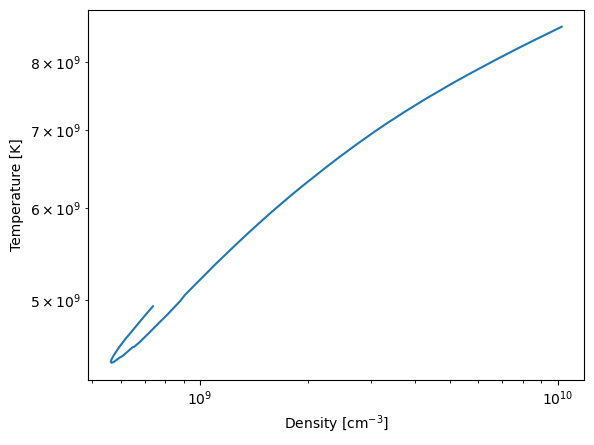

In [12]:
# use df.COLUMN_NAME to access columns directly
den_c = df.dens_c
tmp_c = df.temp_c

plt.plot(den_c, tmp_c,)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Density [cm$^{-3}$]")
plt.ylabel("Temperature [K]")

In [14]:
# generate combined history file from multiple runs
# You could specify start_stg to skip several stages if needed
# the default is start_stg=1
history._generate_combined_data(save_flag=True, start_stg=10)  
# read combined history
hist_comb = hr.HoshiHistoryCombined(hm.summary_dir)

# you can access variable names
print(hist_comb.var_names)

# the combined time series data is also stored in a pandas DataFrame
df_combined = hist_comb.dataframe

['stg', 'jcma', 'nmlo', 'ndv', 'time', 'dtime', 'Mtot', 'Etot', 'Jtot', 'dMdt', 'frot', 'dens_c', 'temp_c', 'Rsurf', 'Lsurf', 'Teff', 'vrot', '[N/H]', 'Gedd', 'gam_ave', 'mach_max', 'Brad', 'fconf', 'fbrak', 'eta_B', 'omgs[d-1]', 'omgc[d-1]', 'Lnuc', 'Lnu', 'Lrad']


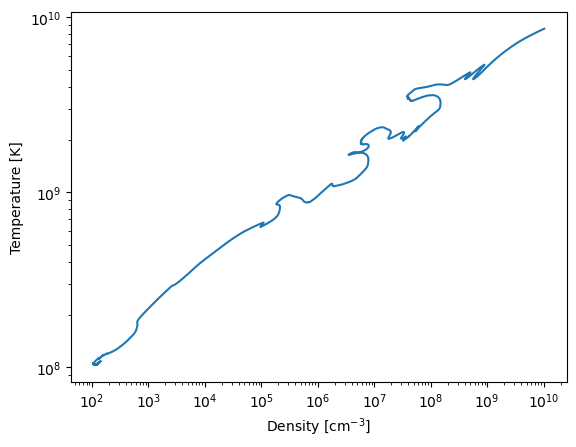

In [15]:
# use df.COLUMN_NAME to access columns directly
den_c = df_combined.dens_c
# for HoshiHistoryCombined, you can also use data() method to get column data
tmp_c = hist_comb.data('temp_c')


plt.plot(den_c, tmp_c,)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Density [cm$^{-3}$]")
plt.ylabel("Temperature [K]")
plt.show()